<a href="https://colab.research.google.com/github/meetrafay/fruit-classification-transfer-learning-yolo/blob/main/Another_copy_of_CV_Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports neccessary packages and libraries
import os
import cv2
import time
import random
import numpy as np
import seaborn as sns
import tensorflow as tf
from numpy import argmax
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model, Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16, EfficientNetB0
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, BatchNormalization, GlobalAveragePooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Bonus Tasks: OpenCV Image Preprocessing & Visualization

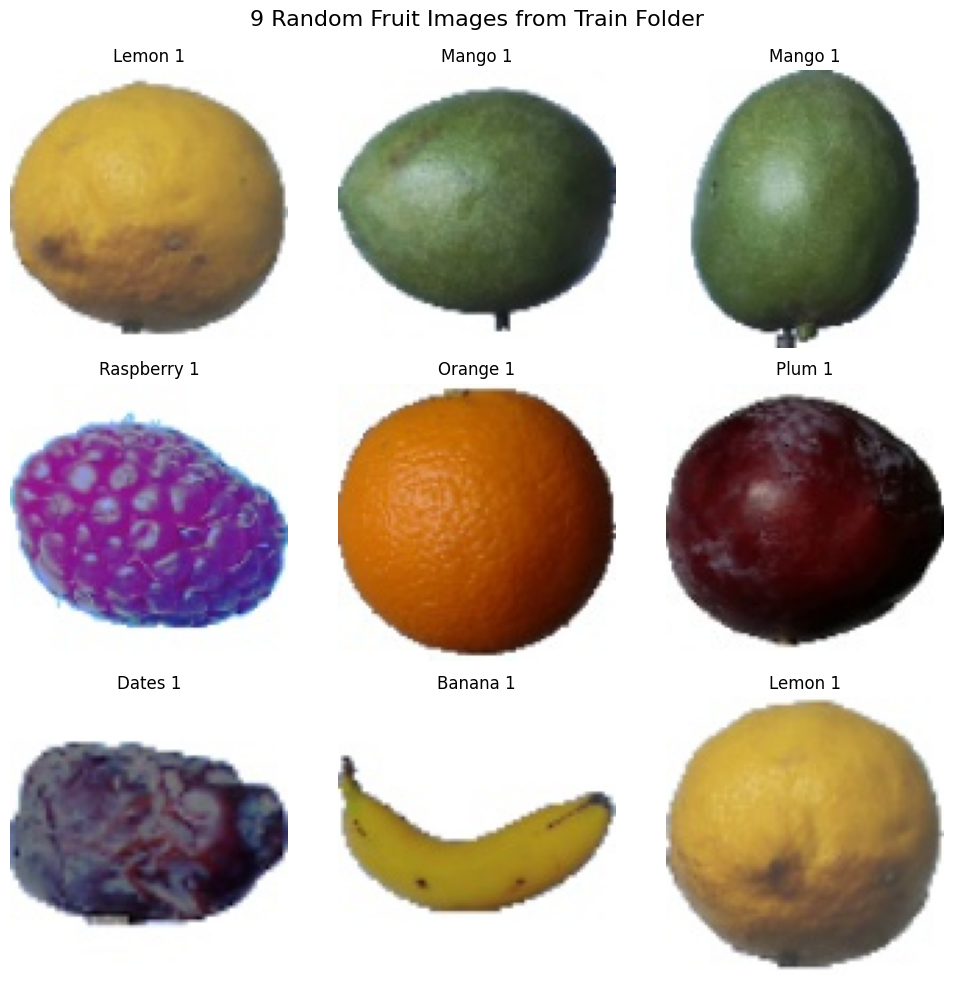

In [ ]:
train_dir = '/content/drive/MyDrive/DataSets/final_data/train'

class_folders = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Collect all image paths with labels
image_paths = []
for class_folder in class_folders:
    label = os.path.basename(class_folder)
    for file in os.listdir(class_folder):
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_paths.append((os.path.join(class_folder, file), label))

# Select 9 random images
random_images = random.sample(image_paths, 9)

# Plot images
plt.figure(figsize=(10, 10))
for i, (img_path, label) in enumerate(random_images):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i + 1)
    plt.imshow(img_rgb)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.suptitle("9 Random Fruit Images from Train Folder", fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

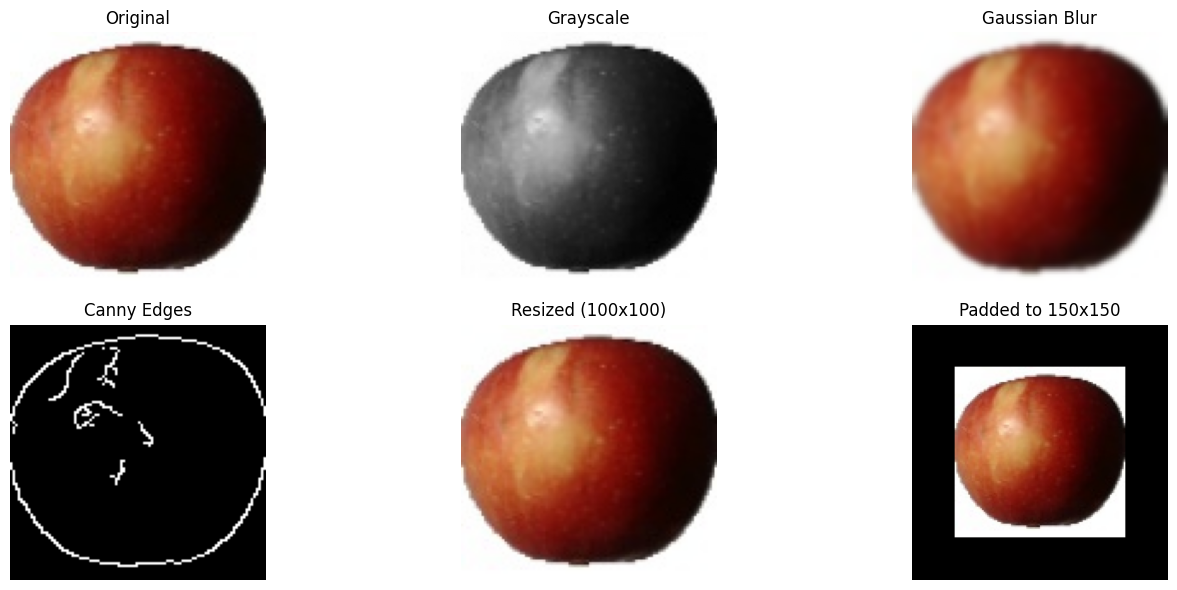

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DataSets/final_data/train/Apple Braeburn 1/0_100.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Canny Edge Detection
edges = cv2.Canny(img, 100, 200)

# Resize image to 100x100
resized = cv2.resize(img, (100, 100))

# Pad image to 150x150 with black border
padded = cv2.copyMakeBorder(
    resized,
    top=25, bottom=25, left=25, right=25,
    borderType=cv2.BORDER_CONSTANT,
    value=[0, 0, 0]
)
padded_rgb = cv2.cvtColor(padded, cv2.COLOR_BGR2RGB)

# Display all transformations
plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Resized (100x100)")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(padded_rgb)
plt.title("Padded to 150x150")
plt.axis("off")

plt.tight_layout()
plt.show()

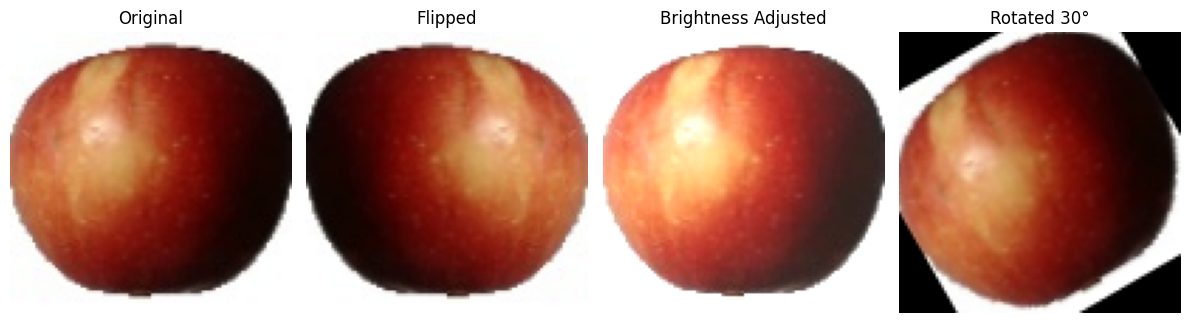

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DataSets/final_data/train/Apple Braeburn 1/0_100.jpg')  # replace with your image path
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 1. Horizontal Flip
flipped = cv2.flip(img, 1)
flipped_rgb = cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)

# 2. Brightness Adjustment (alpha = contrast, beta = brightness)
bright = cv2.convertScaleAbs(img, alpha=1.2, beta=30)
bright_rgb = cv2.cvtColor(bright, cv2.COLOR_BGR2RGB)

# 3. Rotation (30 degrees)
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 30, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))
rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)

# Plot original and augmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(flipped_rgb)
plt.title("Flipped")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(bright_rgb)
plt.title("Brightness Adjusted")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(rotated_rgb)
plt.title("Rotated 30°")
plt.axis("off")

plt.tight_layout()
plt.show()


#This code used to unzib ans restructure data folders.

In [ ]:
# from google.colab import drive
# import zipfile
# import os


# # Path to the zip file in Google Drive
# zip_path = '/content/drive/MyDrive/DATA SETS/fruit_dataset/archive (1).zip'  # Replace with your actual path

# # Directory to extract the contents to
# extract_path = '/content/drive/MyDrive/DATA SETS/fruit_dataset/extracted_data'

# # Create the extraction directory if it doesn't exist
# os.makedirs(extract_path, exist_ok=True)

# try:
#     # Open the zip file
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         # Extract all contents to the specified directory
#         zip_ref.extractall(extract_path)
#     print(f'Successfully extracted to {extract_path}')
# except FileNotFoundError:
#     print(f'Error: Zip file not found at {zip_path}. Please check the file path.')
# except zipfile.BadZipFile:
#     print(f'Error: Invalid zip file. Make sure the file is a valid zip archive.')
# except Exception as e:
#     print(f'An unexpected error occurred: {e}')

In [ ]:
# import os
# import shutil

# original_train_path = '/content/drive/MyDrive/DATA SETS/fruit_dataset/extracted_data/fruits-360_100x100/fruits-360/Training'
# original_test_path = '/content/drive/MyDrive/DATA SETS/fruit_dataset/extracted_data/fruits-360_100x100/fruits-360/Test'
# new_train_path = '/content/drive/MyDrive/DATA SETS/fruit_dataset/extracted_data/final_data/Training'
# new_test_path = '/content/drive/MyDrive/DATA SETS/fruit_dataset/extracted_data/final_data/Test'

# selected_classes = [
#     'Apple Braeburn 1', 'Banana 1', 'Cactus fruit 1', 'Dates 1', 'Grape Blue 1',
#     'Kiwi 1', 'Lemon 1', 'Mango 1', 'Orange 1', 'Pear 1',
#     'Pineapple 1', 'Plum 1', 'Raspberry 1', 'Strawberry 1', 'Tomato 1'
# ]

# os.makedirs(new_train_path, exist_ok=True)
# os.makedirs(new_test_path, exist_ok=True)

# for fruit_class in selected_classes:
#     shutil.copytree(os.path.join(original_train_path, fruit_class),
#                     os.path.join(new_train_path, fruit_class))
#     shutil.copytree(os.path.join(original_test_path, fruit_class),
#                     os.path.join(new_test_path, fruit_class))

# print("✅ Small dataset with 15 classes created.")

#Part 1: Image Classification using Transfer Learning


In [ ]:
# apply data augmentation and create data generator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

DATA_DIR = '/content/drive/MyDrive/DataSets/final_data'

train_dir = os.path.join(DATA_DIR, 'train')
test_dir  = os.path.join(DATA_DIR, 'val')

train_datagen = ImageDataGenerator(
    rescale=1./255,             # normalize pixels to [0,1]
    rotation_range=30,          # rotate images up to 30°
    zoom_range=0.2,             # zoom in/out by 20%
    horizontal_flip=True,       # flip images horizontally
    brightness_range=[0.7, 1.3] # randomly darken/brighten
)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 8022 images belonging to 15 classes.
Found 2693 images belonging to 15 classes.


In [ ]:
# Early stopping: stops training if val_loss doesn't improve for 10 epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Model checkpoint: saves best model (lowest val_loss)
checkpoint = ModelCheckpoint(
    filepath='best_model.keras', # Saves in native Keras format
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [ ]:
# Use pre buid ResNet50 and train it on our dataset
base_model = ResNet50(
    weights='imagenet',
    include_top=False, # exclude top layer
    input_shape=(224, 224, 3)
)

base_model.trainable = False # freeze convolutional layers

# build custom layers on top of it
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(15, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_tl = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint],
    verbose=2
)

In [ ]:
model.save('/content/drive/MyDrive/DataSets/models/resnet50.keras')

In [ ]:
# Function used to build models
def build_model(base_model, name):
    base_model.trainable = False  # freeze pretrained layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(15, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output, name=name)
    return model

In [ ]:
vgg_model = build_model(VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), "VGG16")
efficientnet_model = build_model(EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), "EfficientNetB0")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
models = [vgg_model, efficientnet_model]

for model in models:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
for model in models:
    print(f"\nTraining model: {model.name}")
    model.fit(train_generator, epochs=5, validation_data=val_generator)

    # Construct save path dynamically based on model name
    save_path = f"/content/drive/MyDrive/DataSets/models/{model.name.lower()}_model.keras"
    model.save(save_path)
    print(f"✅ Saved {model.name} to: {save_path}")


Training model: VGG16


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 4353s 17s/step - accuracy: 0.3970 - loss: 2.0587 - val_accuracy: 0.8121 - val_loss: 0.7561
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 153s 609ms/step - accuracy: 0.8183 - loss: 0.7058 - val_accuracy: 0.9398 - val_loss: 0.3642
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 152s 606ms/step - accuracy: 0.8951 - loss: 0.4339 - val_accuracy: 0.9710 - val_loss: 0.2166
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 154s 612ms/step - accuracy: 0.9095 - loss: 0.3370 - val_accuracy: 0.9937 - val_loss: 0.1417
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 153s 608ms/step - accuracy: 0.9283 - loss: 0.2654 - val_accuracy: 0.9989 - val_loss: 0.1073
✅ Saved VGG16 to: /content/drive/MyDrive/DataSets/models/vgg16_model.keras

Training model: EfficientNetB0
Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 181s 634ms/step - accuracy: 0.1154 - loss: 2.7118 - val_accuracy: 0.1218 - val_loss: 2.6856
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 138s 550ms/step - accuracy: 0.1206 - loss: 2.6866 - val_accuracy: 0.1

In [ ]:
# load train models
model_ResNet50 = load_model('/content/drive/MyDrive/DataSets/models/resnet50.keras')
model_VGG16 = load_model('/content/drive/MyDrive/DataSets/models/vgg16_model.keras')
model_EfficientNetB0 = load_model('/content/drive/MyDrive/DataSets/models/efficientnetb0_model.keras')

In [ ]:
# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Function to evaluate model
def evaluate_model(model, test_generator):
    print(f"\n📊 Evaluating {model}")

    # Record training start time
    start_time = time.time()

    # Predict classes
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    # Accuracy, precision, recall
    print("\n🔍 Classification Report:")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

    # Confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print training time
    end_time = time.time()
    print(f"⏱️ Inference Time: {end_time - start_time:.2f} seconds")



📊 Evaluating <Functional name=functional, built=True>


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 1138s 13s/step

🔍 Classification Report:
                  precision    recall  f1-score   support

Apple Braeburn 1       0.00      0.00      0.00       164
        Banana 1       0.05      0.08      0.06       166
  Cactus fruit 1       0.04      0.01      0.02       166
         Dates 1       0.07      0.06      0.07       166
    Grape Blue 1       0.12      0.45      0.19       328
          Kiwi 1       0.00      0.00      0.00       156
         Lemon 1       0.00      0.00      0.00       164
         Mango 1       0.00      0.00      0.00       166
        Orange 1       0.00      0.00      0.00       160
          Pear 1       0.00      0.00      0.00       164
     Pineapple 1       0.07      0.08      0.08       166
          Plum 1       0.00      0.00      0.00       151
     Raspberry 1       0.06      0.04      0.05       166
    Strawberry 1       0.06      0.10      0.08       164
        Tomato 1       0.08      0.14      0.11       246

  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


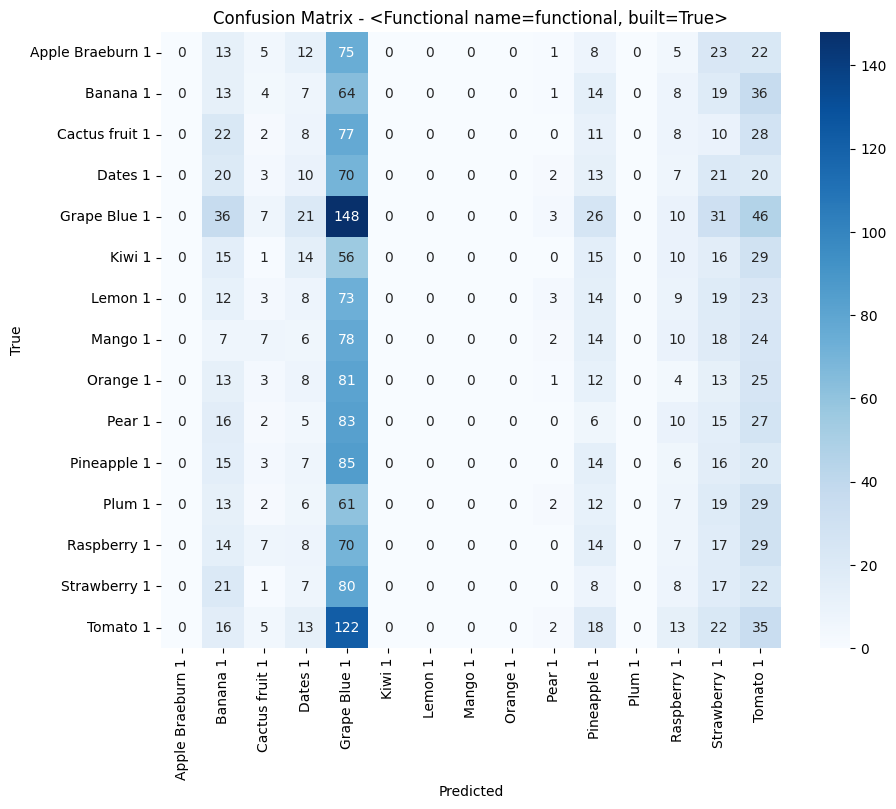

⏱️ Inference Time: 1170.65 seconds

📊 Evaluating <Functional name=VGG16, built=True>
85/85 ━━━━━━━━━━━━━━━━━━━━ 28s 208ms/step

🔍 Classification Report:
                  precision    recall  f1-score   support

Apple Braeburn 1       0.07      0.07      0.07       164
        Banana 1       0.13      0.13      0.13       166
  Cactus fruit 1       0.06      0.06      0.06       166
         Dates 1       0.06      0.06      0.06       166
    Grape Blue 1       0.13      0.13      0.13       328
          Kiwi 1       0.05      0.05      0.05       156
         Lemon 1       0.04      0.04      0.04       164
         Mango 1       0.04      0.04      0.04       166
        Orange 1       0.07      0.07      0.07       160
          Pear 1       0.04      0.04      0.04       164
     Pineapple 1       0.06      0.06      0.06       166
          Plum 1       0.05      0.05      0.05       151
     Raspberry 1       0.04      0.04      0.04       166
    Strawberry 1       0.06      0

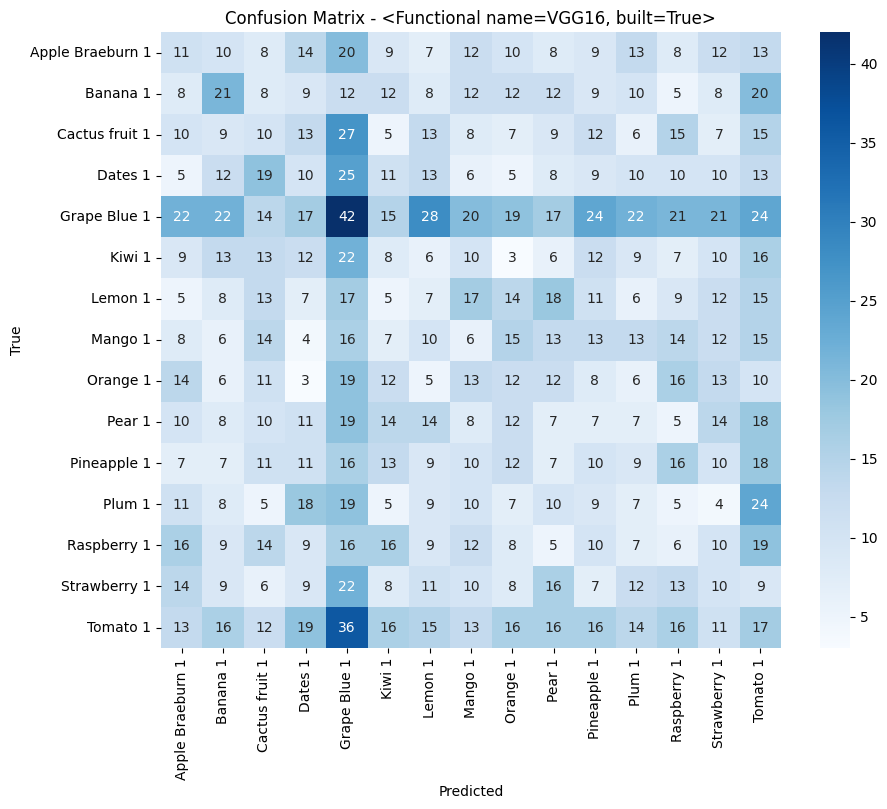

⏱️ Inference Time: 29.11 seconds

📊 Evaluating <Functional name=EfficientNetB0, built=True>
85/85 ━━━━━━━━━━━━━━━━━━━━ 25s 200ms/step

🔍 Classification Report:
                  precision    recall  f1-score   support

Apple Braeburn 1       0.00      0.00      0.00       164
        Banana 1       0.00      0.00      0.00       166
  Cactus fruit 1       0.00      0.00      0.00       166
         Dates 1       0.00      0.00      0.00       166
    Grape Blue 1       0.12      1.00      0.22       328
          Kiwi 1       0.00      0.00      0.00       156
         Lemon 1       0.00      0.00      0.00       164
         Mango 1       0.00      0.00      0.00       166
        Orange 1       0.00      0.00      0.00       160
          Pear 1       0.00      0.00      0.00       164
     Pineapple 1       0.00      0.00      0.00       166
          Plum 1       0.00      0.00      0.00       151
     Raspberry 1       0.00      0.00      0.00       166
    Strawberry 1       0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


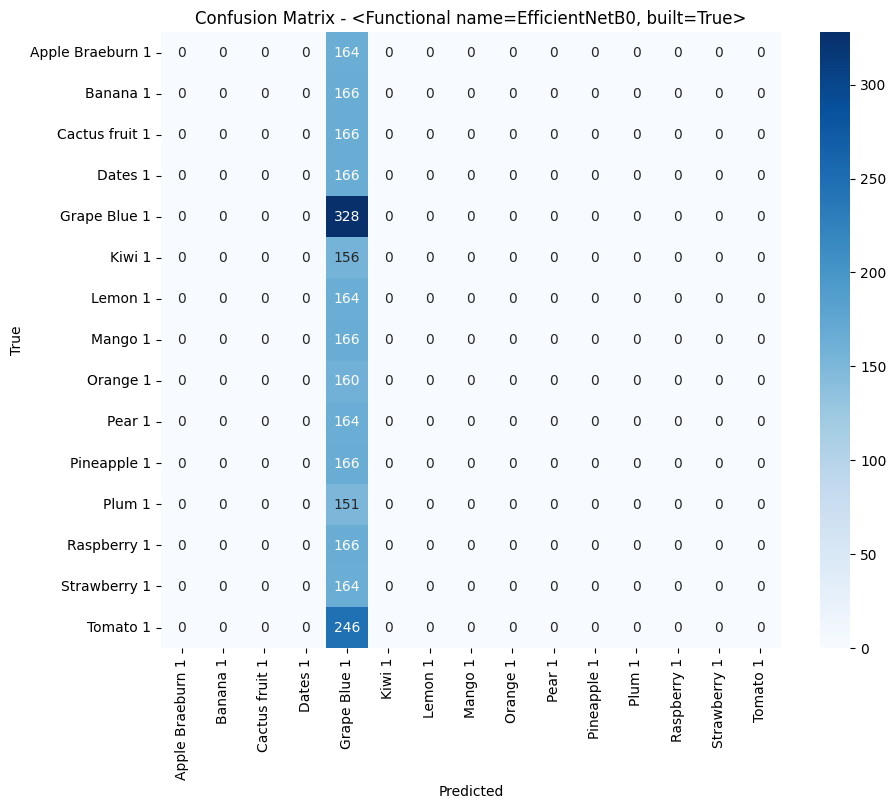

⏱️ Inference Time: 41.70 seconds


In [ ]:
models = [model_ResNet50, model_VGG16, model_EfficientNetB0]
for model in models:
    evaluate_model(model, val_generator)

#Part 2: YOLO as a Classifier (Image-Level Classification)


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
pip install -U ultralytics

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
pip install --upgrade ultralytics

In [ ]:
model = YOLO('yolov8n-cls.pt')  # or yolov8m-cls.pt

In [ ]:
model.train(data='/content/drive/MyDrive/DataSets/final_data', epochs=20)

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/DataSets/final_data, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

train: Scanning /content/drive/.shortcut-targets-by-id/1T1Q29c75gRO6gZHWm-GxWeDcODFdwtaS/final_data/train... 8022 images, 0 corrupt: 100%|██████████| 8022/8022 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 2.4±2.4 ms, read: 2.0±1.8 MB/s, size: 4.7 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1T1Q29c75gRO6gZHWm-GxWeDcODFdwtaS/final_data/val... 2693 images, 0 corrupt: 100%|██████████| 2693/2693 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20     0.252G      2.773         16        224:   0%|          | 1/502 [00:00<00:52,  9.52it/s]Thread-29 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
TypeError: plot_images() got an unexpected keyword argument 'batch_idx'
       1/20     0.277G      2.723         16        224:   0%|          | 1/502 [00:00<00:52,  9.52it/s]Exception in thread Thread-30 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
TypeError: plot_images() got an unexpected keyword argument 'batch_idx'
       1/20     0.277G      2.677         16        224:   1%|          | 3/502 [00:00<00:36, 13.79it/s]Thread-31 (plo

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:16<00:00,  5.28it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:15<00:00,  5.50it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:16<00:00,  5.13it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:19<00:00,  4.36it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:15<00:00,  5.45it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:14<00:00,  5.76it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:15<00:00,  5.59it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:15<00:00,  5.63it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.289G   0.004984          6        224: 100%|██████████| 502/502 [01:12<00:00,  6.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:15<00:00,  5.53it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.289G  5.154e-05         16        224:   0%|          | 1/502 [00:00<04:57,  1.68it/s]Thread-33 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
TypeError: plot_images() got an unexpected keyword argument 'batch_idx'
      11/20     0.289G  9.976e-05         16        224:   0%|          | 1/502 [00:00<04:57,  1.68it/s]Exception in thread Thread-34 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
      11/20     0.289G  9.976e-05         16        224:   0%|          | 2/502 [00:00<02:37,  3.18it/s]    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
TypeError: plot_images() got an unexpected keyword argument 'batch_idx'
      11/20   

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.289G   0.005447          6        224: 100%|██████████| 502/502 [01:12<00:00,  6.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:17<00:00,  4.89it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.289G   0.003514          6        224: 100%|██████████| 502/502 [01:19<00:00,  6.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:16<00:00,  5.15it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.289G   0.004879          6        224: 100%|██████████| 502/502 [01:20<00:00,  6.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:15<00:00,  5.36it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.289G   0.003677          6        224: 100%|██████████| 502/502 [01:18<00:00,  6.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:16<00:00,  5.11it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.289G   0.003471          6        224: 100%|██████████| 502/502 [01:17<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:15<00:00,  5.35it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.289G   0.002455          6        224: 100%|██████████| 502/502 [01:13<00:00,  6.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:15<00:00,  5.57it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.289G   0.003013          6        224: 100%|██████████| 502/502 [01:12<00:00,  6.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:15<00:00,  5.48it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.289G      0.003          6        224: 100%|██████████| 502/502 [01:13<00:00,  6.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:15<00:00,  5.34it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.289G   0.001803          6        224: 100%|██████████| 502/502 [01:11<00:00,  7.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:15<00:00,  5.57it/s]

                   all          1          1



20 epochs completed in 1.136 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,454,095 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/.shortcut-targets-by-id/1T1Q29c75gRO6gZHWm-GxWeDcODFdwtaS/final_data/train... found 8022 images in 15 classes ✅ 
val: /content/drive/.shortcut-targets-by-id/1T1Q29c75gRO6gZHWm-GxWeDcODFdwtaS/final_data/val... found 2693 images in 15 classes ✅ 
test: None...


               classes   top1_acc   top5_acc:   6%|▌         | 5/85 [00:00<00:15,  5.22it/s]

               classes   top1_acc   top5_acc:  16%|█▋        | 14/85 [00:02<00:11,  6.34it/s]
100%|██████████| 755k/755k [00:00<00:00, 79.1MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 85/85 [00:15<00:00,  5.52it/s]


                   all          1          1
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ae4d4065850>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.07953011251402892, 'inference': 0.30565454325934516, 'loss': 0.00044796138160093935, 'postprocess': 0.0006292272575806624}
task: 'classify'
top1: 1.0
top5: 1.0

In [ ]:
# train_yolo_model = YOLO('runs/classify/train/weights/best.pt')
metrics = model.val()

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,454,095 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/.shortcut-targets-by-id/1T1Q29c75gRO6gZHWm-GxWeDcODFdwtaS/final_data/train... found 8022 images in 15 classes ✅ 
val: /content/drive/.shortcut-targets-by-id/1T1Q29c75gRO6gZHWm-GxWeDcODFdwtaS/final_data/val... found 2693 images in 15 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 12.4±25.8 ms, read: 2.0±1.8 MB/s, size: 4.7 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1T1Q29c75gRO6gZHWm-GxWeDcODFdwtaS/final_data/val... 2693 images, 0 corrupt: 100%|██████████| 2693/2693 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 169/169 [00:15<00:00, 10.88it/s]


                   all          1          1
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train22


In [ ]:
top1_acc = metrics.top1  # Access the top1 attribute directly

print(f"📈 YOLOv8 Classifier Top-1 Accuracy: {top1_acc:.4f}")

📈 YOLOv8 Classifier Top-1 Accuracy: 1.0000


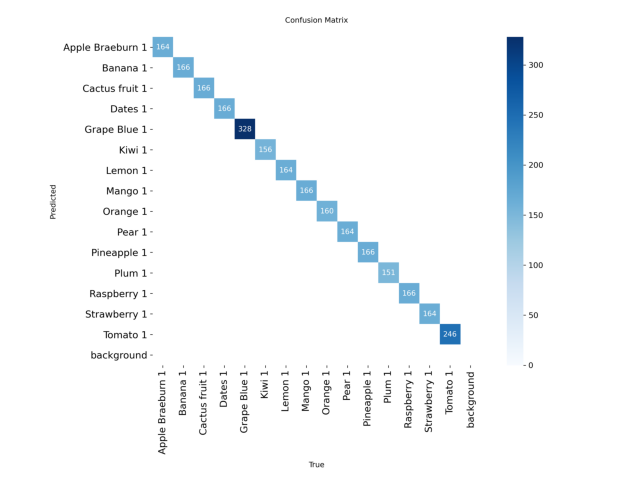

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

cm_img = Image.open('runs/classify/train2/confusion_matrix.png')
plt.figure(figsize=(8, 8))
plt.imshow(cm_img)
plt.axis('off')
plt.show()
